# Assignment 21 - Human Activity Detection

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :


* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install hyperas

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
warnings.simplefilter("ignore")

Using TensorFlow backend.


#1.1 Extracting the features

In [4]:
# get the features from the file features.txt
features = list()
with open('/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# 1.2 Obtain fron train data

In [5]:
X_train = pd.read_csv('/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features
X_train['subject'] = pd.read_csv('/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)
y_train = pd.read_csv('/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,

In [6]:
print("Size of Train data = {}".format(train.shape))

Size of Train data = (7352, 564)


# 1.3 Obtain from test data

In [7]:
X_test = pd.read_csv("/content/drive/My Drive/data/HAR/UCI_HAR_Dataset/test/X_test.txt", delim_whitespace = True, header = None)
X_test.columns = features
X_test['subject'] = pd.read_csv('/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)#return data in pandas series format
y_test = pd.read_csv('/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.968260,-0.561266,-0.897436,-0.168805,-0.662317,

In [8]:
print("Size of Test data = {}".format(test.shape))

Size of Test data = (2947, 564)


# 2. Data Cleaning

In [9]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(test.isnull().sum().sum()))

Number of NaN values in train data is 0
Number of NaN values in test data is 0



Graphical representation of null values for train data



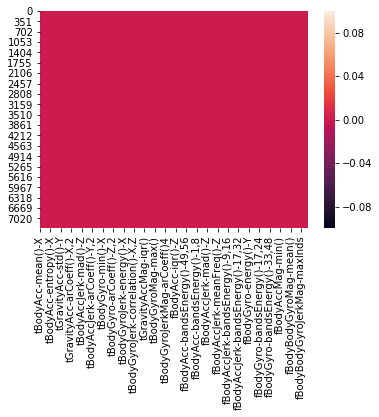

In [10]:
print("\nGraphical representation of null values for train data\n")

sns.heatmap(train.isnull())


Graphical representation of null values for test data



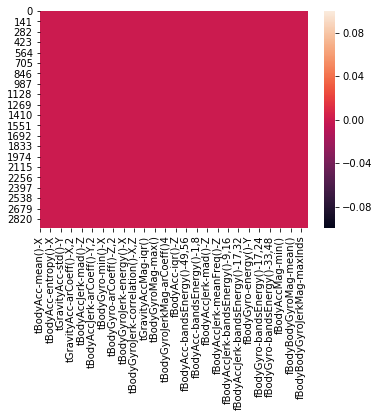

In [11]:
print("\nGraphical representation of null values for test data\n")

sns.heatmap(test.isnull())

In [12]:
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train.duplicated())))
print("Number of duplicate values in test data is "+str(sum(test.duplicated())))

Number of duplicate values in train data is 0
Number of duplicate values in test data is 0


# 3. Checking for imbalance in the data

In [13]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 13.1MB 8.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


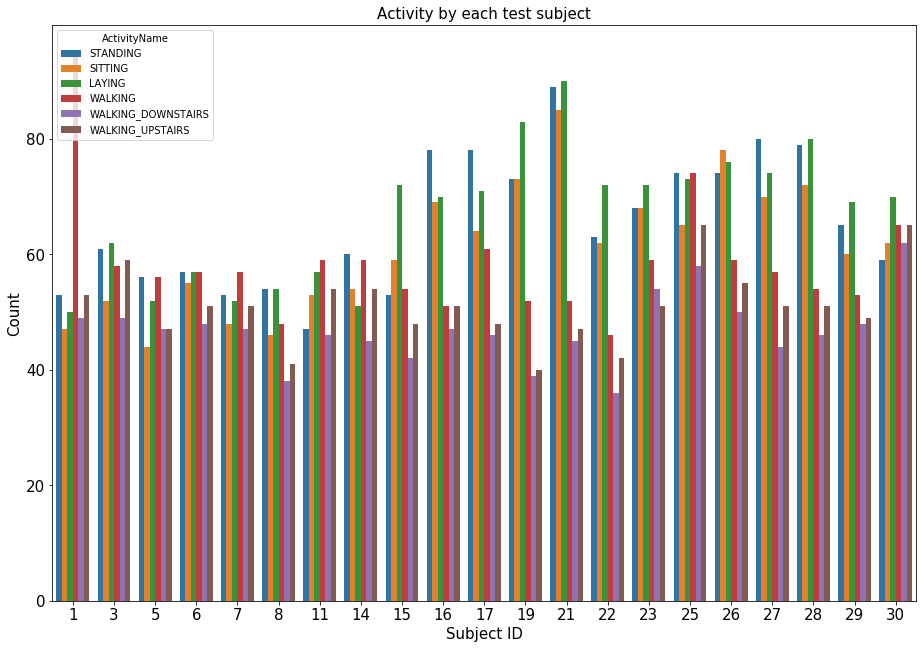

In [13]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject", hue = "ActivityName", data = train)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

([<matplotlib.patches.Wedge at 0x7fd54662b9e8>,
 [Text(1.4431238278887235, 0.9898957608656574, '1: WALKING : 1226'),
  Text(-0.3798237460574488, 1.7082839113949668, '2 : WALKING_UPSTAIRS : 1073'),
  Text(-1.7095723197702357, 0.37398192934340496, '3 : WALKING_DOWNSTAIRS : 986'),
  Text(-1.1443614362337686, -1.323985235288138, '4 : SITTING : 1286'),
  Text(0.46616160314671445, -1.6867700968868538, '5 : STANDING : 1374'),
  Text(1.5969558711437852, -0.7157038113768814, '6 : LAYING : 1407')])

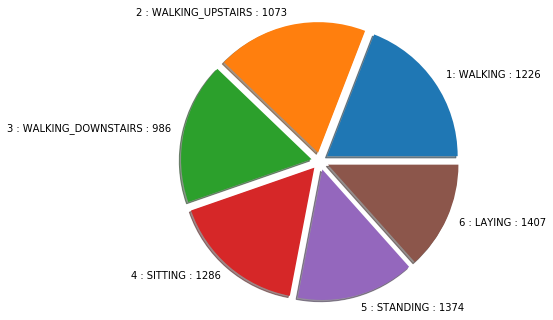

In [14]:
labels = ['1: WALKING : 1226', '2 : WALKING_UPSTAIRS : 1073', '3 : WALKING_DOWNSTAIRS : 986',
          '4 : SITTING : 1286', '5 : STANDING : 1374', '6 : LAYING : 1407']  
    
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(train.Activity.value_counts(), explode = explode, labels = labels, radius = 1.5, shadow = True)

Observation - 

1) For Laying activity, maximum count is 1407.

2) For walking downstairs, minimum count is 986.

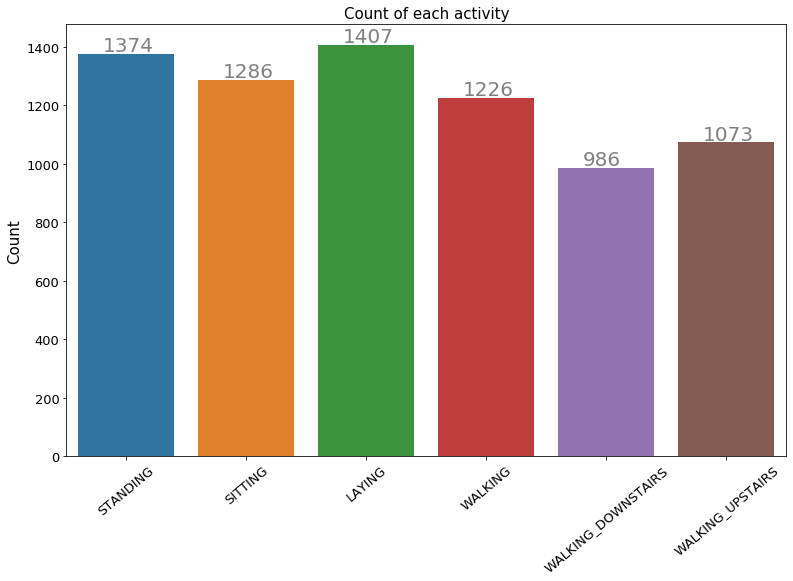

In [15]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "ActivityName", data = train)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

### From the above plots, we can infer that our six classes are almost imbalanced.

## 4. Changing Feature Name

In [16]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '_')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

train.columns
test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

# 5. Save this dataframe in a csv files

In [0]:
train.to_csv('/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

### 1. Featuring Engineering from Domain Knowledge

Static and Dynamic Activities

a) In static activities (sit, stand, lie down) motion information will not be very useful.

b) In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.


### 2. Stationary and Moving activities are completely different

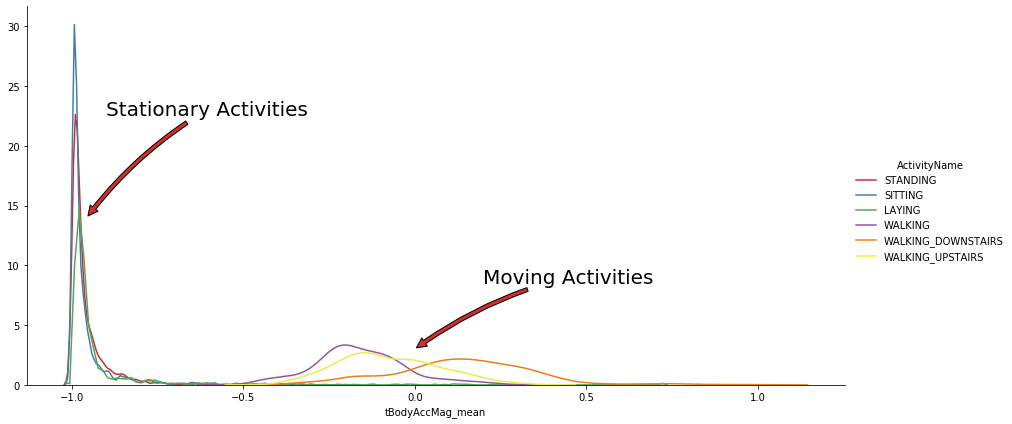

In [18]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag_mean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,14), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

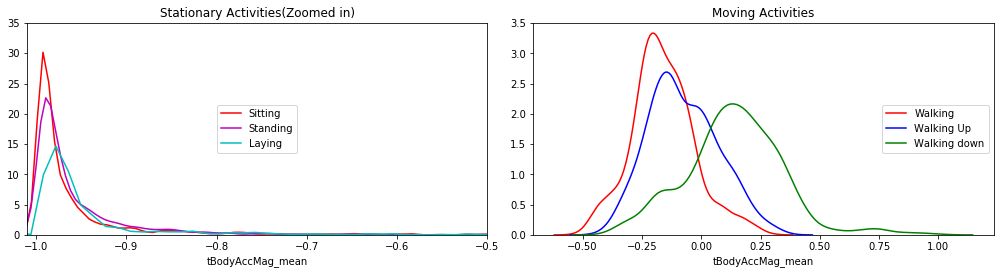

In [19]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMag_mean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMag_mean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMag_mean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMag_mean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMag_mean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMag_mean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

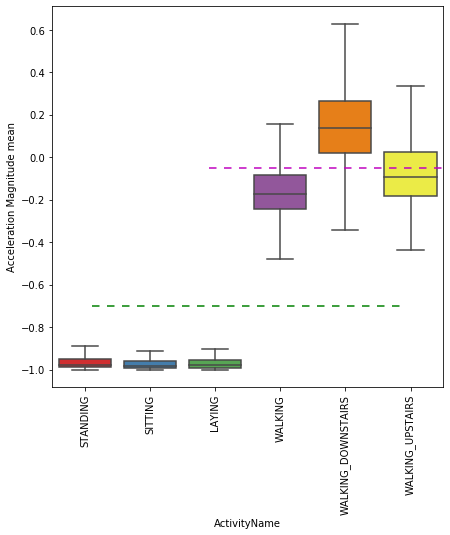

In [20]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMag_mean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

### Observations:

*If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.

*If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.

*If tAccMean > 0.0 then the Activity is WalkingDownstairs.

*We can classify 75% the Acitivity labels with some errors.


### 4. Position of GravityAccelerationComponants also matters

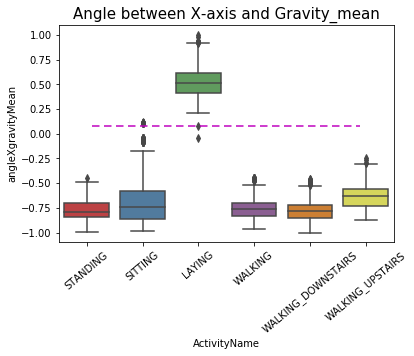

In [21]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

### Observations:

*If angleX,gravityMean > 0 then Activity is Laying.

*We can classify all datapoints belonging to Laying activity with just a single if else statement.


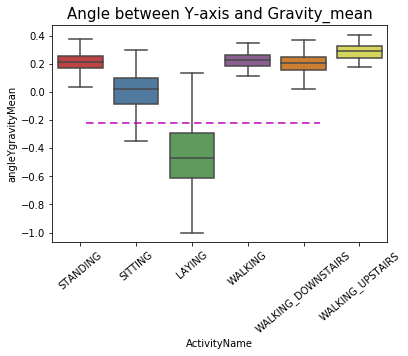

In [22]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# 6 Applying T-SNE

In [0]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.128s...
[t-SNE] Computed neighbors for 7352 samples in 34.429s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.043s
[t-SNE] Iteration 50: error = 124.7385101, gradient norm = 0.0257919 (50 iterations in 4.631s)
[t-SNE] Iteration 100: error = 107.1798553, gradient norm = 0.0265161 (50 iterations in

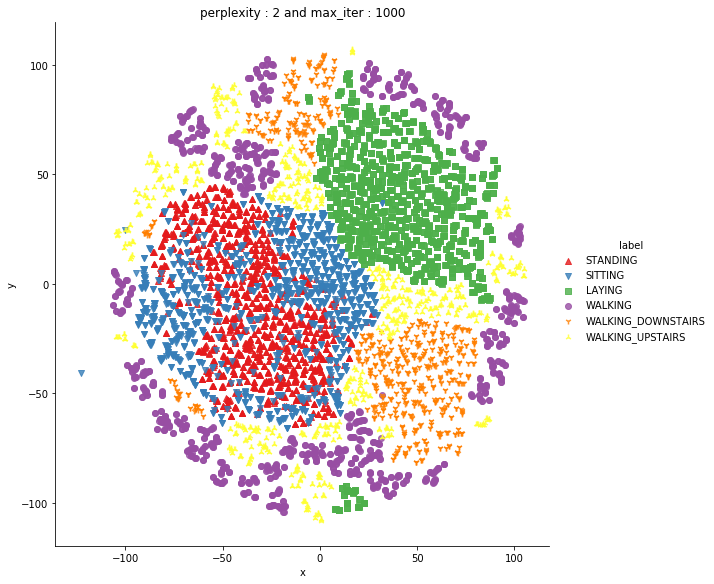

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.164s...
[t-SNE] Computed neighbors for 7352 samples in 34.242s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.058s
[t-SNE] Iteration 50: error = 113.9436264, gradient norm = 0.0197692 (50 iterations in 3.946s)
[t-SNE] Iteration 100: error = 97.9463348, gradient norm = 0.0177656 (50 iteratio

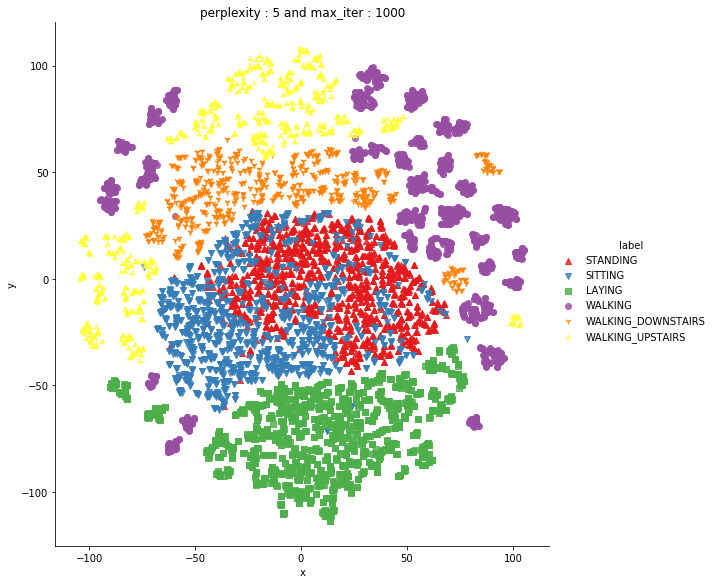

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.145s...
[t-SNE] Computed neighbors for 7352 samples in 34.338s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.108s
[t-SNE] Iteration 50: error = 105.7246323, gradient norm = 0.0205894 (50 iterations in 3.154s)
[t-SNE] Iteration 100: error = 90.2823715, gradient norm = 0.0090520 (50 iterati

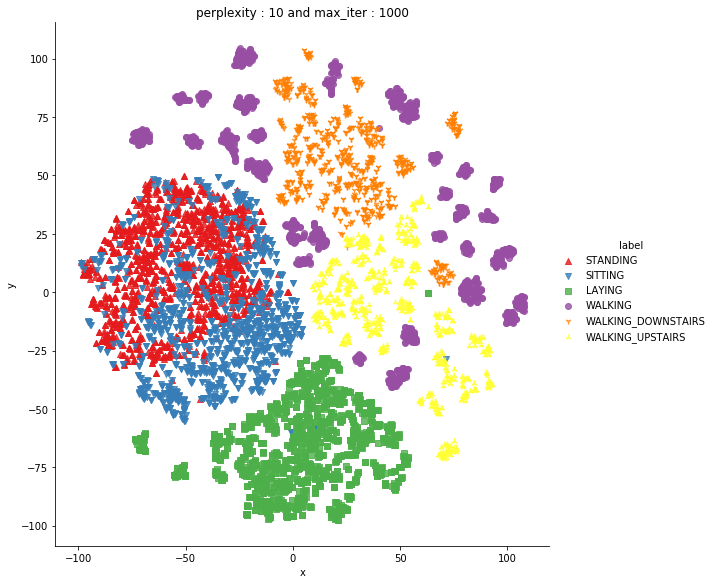

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.141s...
[t-SNE] Computed neighbors for 7352 samples in 34.494s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.210s
[t-SNE] Iteration 50: error = 97.9532928, gradient norm = 0.0105327 (50 iterations in 3.999s)
[t-SNE] Iteration 100: error = 84.7155228, gradient norm = 0.0081219 (50 iteratio

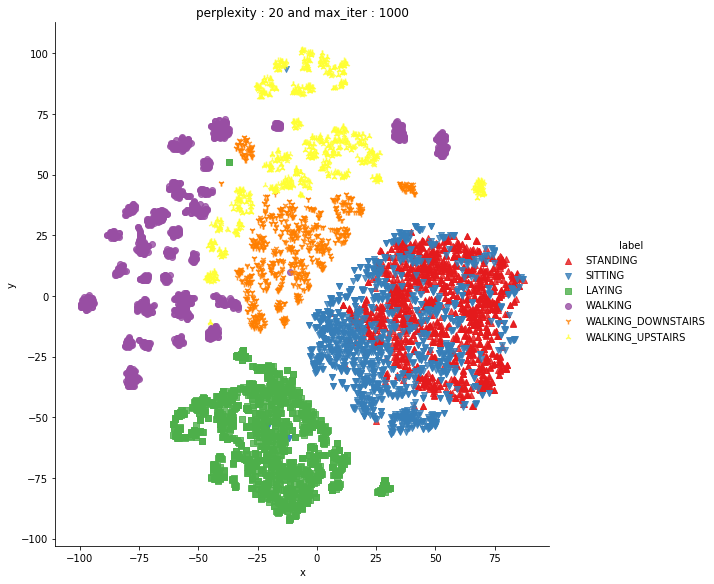

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.133s...
[t-SNE] Computed neighbors for 7352 samples in 34.944s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.507s
[t-SNE] Iteration 50: error = 85.1901627, gradient norm = 0.0329099 (50 iterations in 4.657s)
[t-SNE] Iteration 100: error = 75.5046768, gradient norm = 0.0052348 (50 iterati

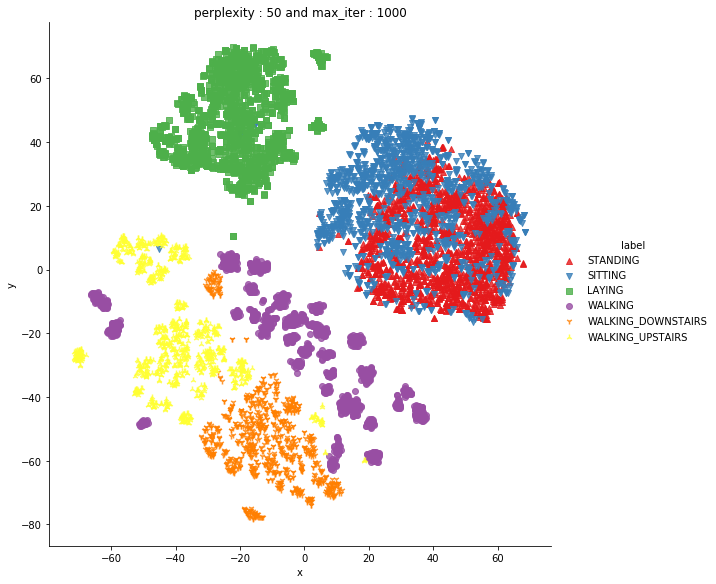

Done


In [25]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])


performing tsne with perplexity 20 and with 2000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.174s...
[t-SNE] Computed neighbors for 7352 samples in 34.165s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.203s
[t-SNE] Iteration 50: error = 97.3409958, gradient norm = 0.0207696 (50 iterations in 3.308s)
[t-SNE] Iteration 100: error = 83.9245453, gradient norm = 0.0064055 (50 iterations in

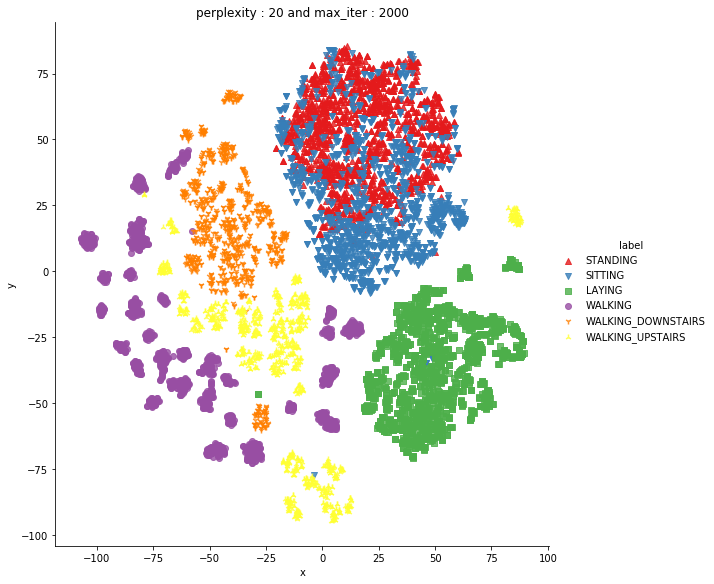

Done

performing tsne with perplexity 50 and with 2000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.163s...
[t-SNE] Computed neighbors for 7352 samples in 35.466s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.513s
[t-SNE] Iteration 50: error = 85.9288025, gradient norm = 0.0250743 (50 iterations in 4.060s)
[t-SNE] Iteration 100: error = 75.5079956, gradient norm = 0.0038877 (50 iterati

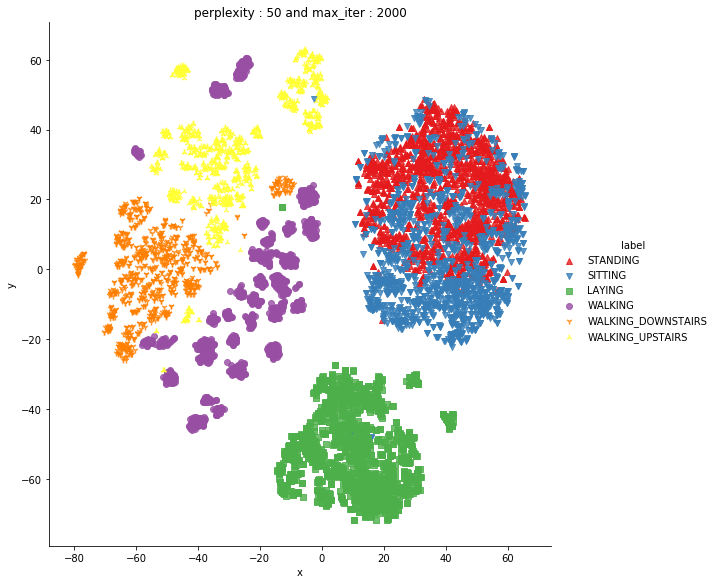

Done

performing tsne with perplexity 90 and with 2000 iterations at max
[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.172s...
[t-SNE] Computed neighbors for 7352 samples in 35.865s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.540175
[t-SNE] Computed conditional probabilities in 0.913s
[t-SNE] Iteration 50: error = 78.2689056, gradient norm = 0.0283987 (50 iterations in 4.397s)
[t-SNE] Iteration 100: error = 69.7179489, gradient norm = 0.0033847 (50 iterati

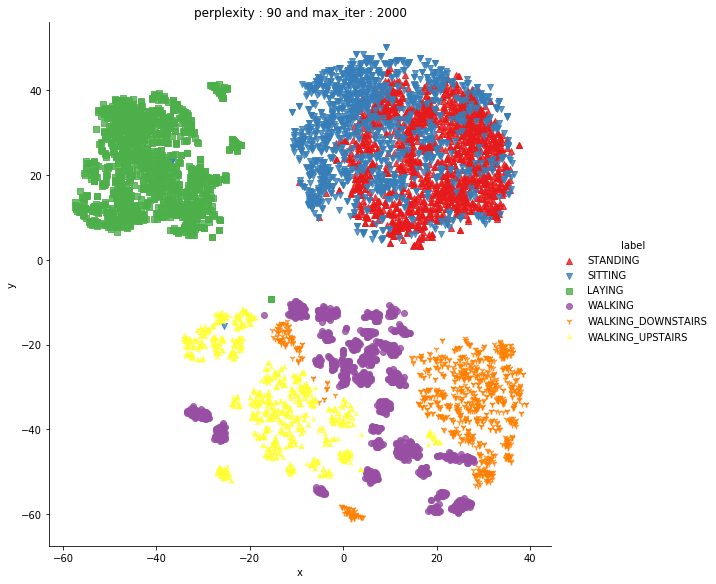

Done


In [26]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20,50,90],n_iter=2000)

# 7 Obtain data from train and test

In [27]:
train = pd.read_csv('/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [28]:
train.head(1)

,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,tBodyAcc_max_Y,tBodyAcc_max_Z,tBodyAcc_min_X,tBodyAcc_min_Y,tBodyAcc_min_Z,tBodyAcc_sma,tBodyAcc_energy_X,tBodyAcc_energy_Y,tBodyAcc_energy_Z,tBodyAcc_iqr_X,tBodyAcc_iqr_Y,tBodyAcc_iqr_Z,tBodyAcc_entropy_X,tBodyAcc_entropy_Y,tBodyAcc_entropy_Z,tBodyAcc_arCoeff_X1,tBodyAcc_arCoeff_X2,tBodyAcc_arCoeff_X3,tBodyAcc_arCoeff_X4,tBodyAcc_arCoeff_Y1,tBodyAcc_arCoeff_Y2,tBodyAcc_arCoeff_Y3,tBodyAcc_arCoeff_Y4,tBodyAcc_arCoeff_Z1,tBodyAcc_arCoeff_Z2,tBodyAcc_arCoeff_Z3,tBodyAcc_arCoeff_Z4,tBodyAcc_correlation_XY,tBodyAcc_correlation_XZ,tBodyAcc_correlation_YZ,...,fBodyBodyAccJerkMag_maxInds,fBodyBodyAccJerkMag_meanFreq,fBodyBodyAccJerkMag_skewness,fBodyBodyAccJerkMag_kurtosis,fBodyBodyGyroMag_mean,fBodyBodyGyroMag_std,fBodyBodyGyroMag_mad,fBodyBodyGyroMag_max,fBodyBodyGyroMag_min,fBodyBodyGyroMag_sma,fBodyBodyGyroMag_energy,fBodyBodyGyroMag_iqr,fBodyBodyGyroMag_entropy,fBodyBodyGyroMag_maxInds,fBodyBodyGyroMag_meanFreq,fBodyBodyGyroMag_skewness,fBodyBodyGyroMag_kurtosis,fBodyBodyGyroJerkMag_mean,fBodyBodyGyroJerkMag_std,fBodyBodyGyroJerkMag_mad,fBodyBodyGyroJerkMag_max,fBodyBodyGyroJerkMag_min,fBodyBodyGyroJerkMag_sma,fBodyBodyGyroJerkMag_energy,fBodyBodyGyroJerkMag_iqr,fBodyBodyGyroJerkMag_entropy,fBodyBodyGyroJerkMag_maxInds,fBodyBodyGyroJerkMag_meanFreq,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.94322,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.35991,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.66079,...,-0.936508,0.346989,-0.51608,-0.80276,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.99924,-0.992656,-0.701291,-1.0,-0.128989,0.586156,0.374605,-0.99199,-0.990697,-0.989941,-0.992448,-0.991048,-0.99199,-0.999937,-0.990458,-0.871306,-1.0,-0.074323,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING


In [0]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [0]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [31]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# 8 Let's model with our data

## Labels that are useful in plotting confusion matrix

In [0]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

## Function to plot the confusion matrix

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Generic function to run any model specified

In [0]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

## Method to print the gridsearch Attributes

In [0]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

# 8.1. Logistic Regression with Grid Search

In [0]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:  2.4min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:02:35.600628


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.009257


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


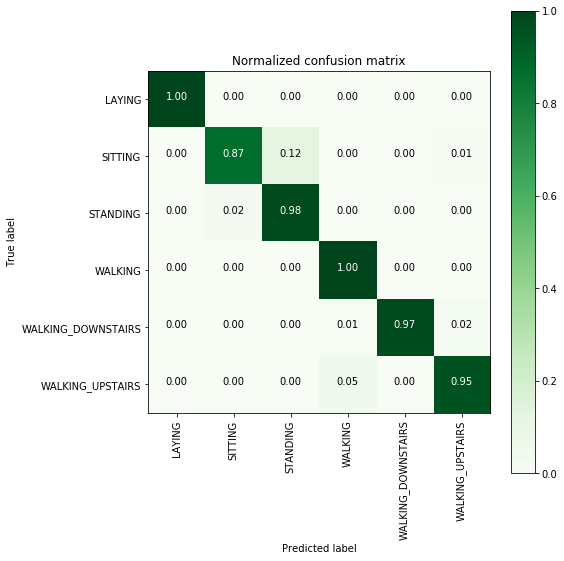

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [37]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

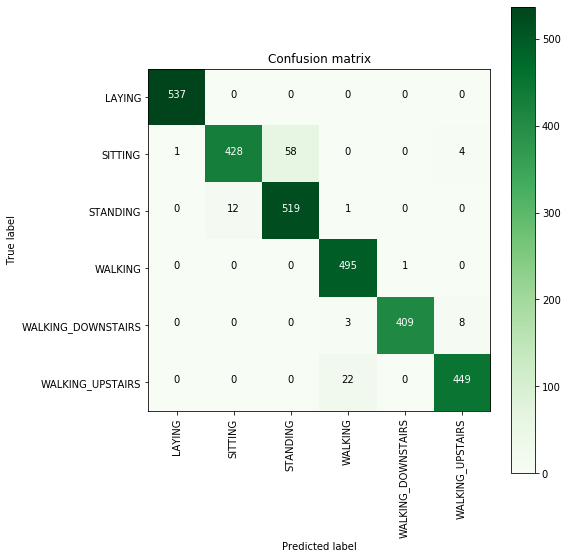

In [38]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [39]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



# 8.2 Linear SVC with Gridsearch

In [0]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:   44.7s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:49.783202


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008875


---------------------
|      Accuracy      |
---------------------

    0.9650492025788938


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 423  62   0   0   4]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


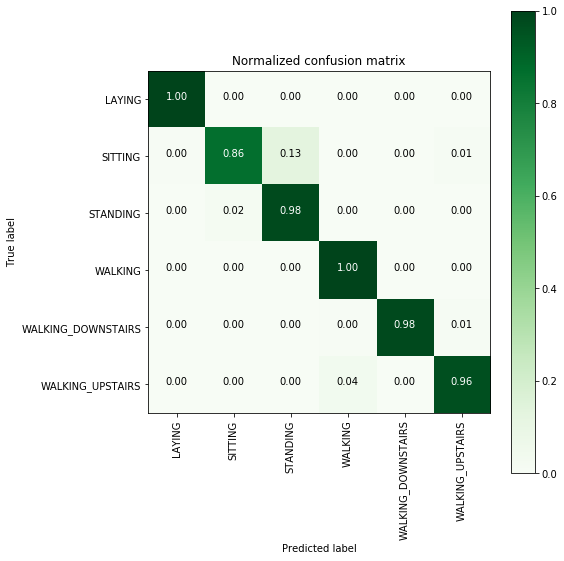

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.92       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.96      0.97      2947
      weighted avg       0.97      0.97      0.96      2947



In [41]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [42]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9462731229597389



# 8.3 Kernel SVM with gridsearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:06:24.431624


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.556758


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


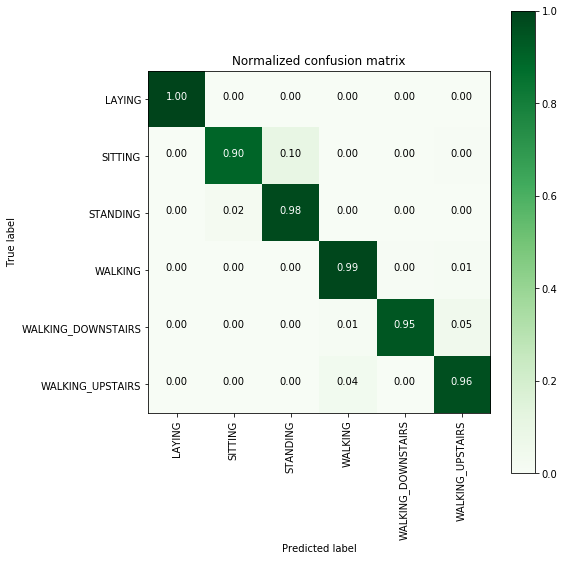

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

CPU times: user 6.33 s, sys: 232 ms, total: 6.56 s
Wall time: 6min 27s


In [43]:
%%time
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters,n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# 8.4 Decision tree with Grid search

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:20.506110


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006404


---------------------
|      Accuracy      |
---------------------

    0.8629114353579912


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 388 103   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 470  18   8]
 [  0   0   0  19 340  61]
 [  0   0   0  73  29 369]]


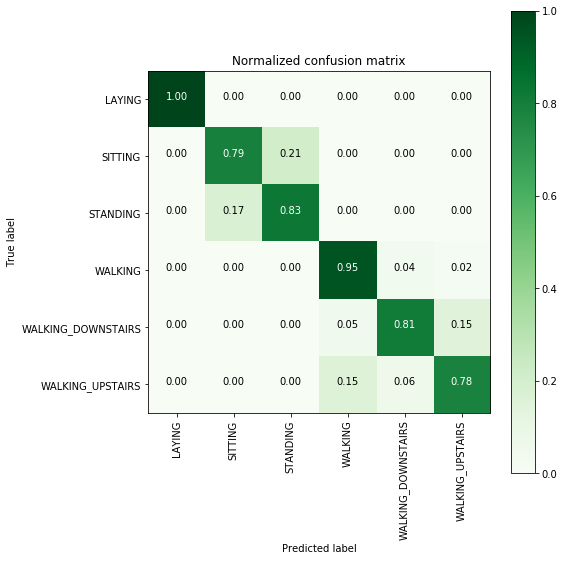

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.88      0.81      0.84       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       mi

In [44]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=8)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 8.5 Random forest classifier with Grid search

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:10:08.662942


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.054251


---------------------
|      Accuracy      |
---------------------

    0.9121140142517815


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 425  66   0   0   0]
 [  0  51 481   0   0   0]
 [  0   0   0 483  11   2]
 [  0   0   0  36 338  46]
 [  0   0   0  41   6 424]]


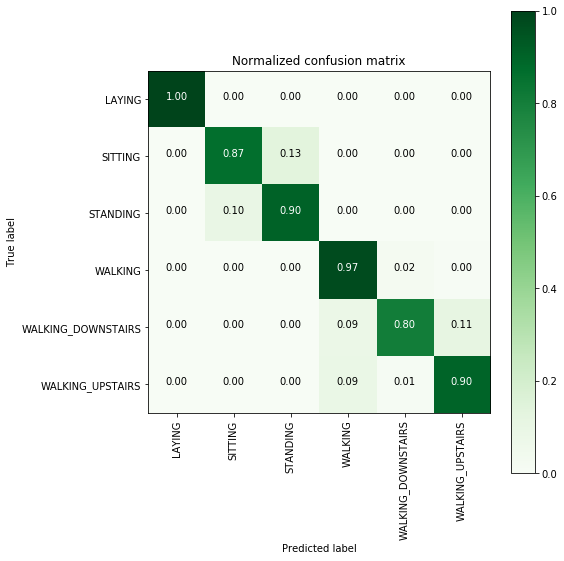

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.87      0.88       491
          STANDING       0.88      0.90      0.89       532
           WALKING       0.86      0.97      0.91       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
       

In [45]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=8)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 8.6 Gradient Boost Decision trees with grid search

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 1:20:49.773319


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.057930


---------------------
|      Accuracy      |
---------------------

    0.9256871394638616


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 402  88   0   0   1]
 [  0  37 495   0   0   0]
 [  0   0   0 485   6   5]
 [  0   0   0  10 374  36]
 [  0   2   0  28   6 435]]


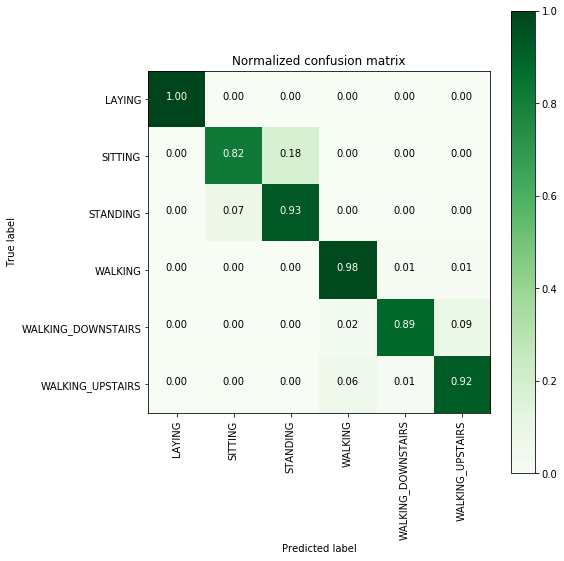

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.82      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.93      0.98      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.92       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           mi

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=8)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

# 8.7 Comparing all the models

In [47]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%       3.733%
Linear SVC          : 96.5%       3.495% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.29%      13.71% 
Random Forest       : 91.21%      8.789% 
GradientBoosting DT : 91.21%      8.789% 


# 9 LSTM

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

## Data 

In [0]:
# Data directory
DATADIR = '/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset'

In [0]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [0]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [0]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/drive/My Drive/HAR data/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [0]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [0]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [0]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [0]:
# Defining 'plt_la' function

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_la(x, vy, ty, ax, t, colors=['b']):
 
  if t == 'loss':
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.title("Epoch vs Loss")
    plt.legend()
    plt.grid()
  
  if t == 'acc':
    ax.plot(x, vy, 'b', label="Validation Accuracy")
    ax.plot(x, ty, 'r', label="Train Accuracy")
    plt.title("Epoch vs Accuracy")
    plt.legend()
    plt.grid()

In [0]:
# Defining a function 'plotting' to visualize epoch vs loss

def plotting(history, t):

  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy')

  # list of epoch numbers
  x = list(range(1,epochs+1))

  # print(history.history.keys())
  # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
  # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  # we will get val_loss and val_acc only when you pass the paramter validation_data
  # val_loss : validation loss
  # val_acc : validation accuracy

  # loss : training loss
  # acc : train accuracy
  # for each key in histrory.histrory we will have a list of length equal to number of epochs
  
  if t == 'loss':
    vy = history.history['val_loss']
    ty = history.history['loss']
  
    plt_la(x, vy, ty, ax, t)
    
  if t == 'acc':
    vy = history.history['val_acc']
    ty = history.history['acc']
  
    plt_la(x, vy, ty, ax, t)
  
  return vy, ty

In [0]:
# Initializing parameters
epochs = 15
batch_size = 16

In [0]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

## Train test split

In [0]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [65]:
len(X_train[0][0])

9

In [66]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


# Model-1

In [67]:
n_hidden = 64

model_1 = Sequential()

# 1 LSTM layer
model_1.add(LSTM(n_hidden, input_shape = (timesteps, input_dim)))     # 1 LSTM

model_1.add(Dropout(0.25))
model_1.add(Dense(n_classes, activation = 'sigmoid'))
model_1.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model_1.summary())




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                18944     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 19,334
Trainable params: 19,334
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
history_1 = model_1.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_data = (X_test, Y_test))

# Final evaluation of the model
scores_1 = model_1.evaluate(X_test, Y_test, verbose = 1)



Train on 7352 samples, validate on 2947 samples
Epoch 1/15




7352/7352 [==============================] - 79s 11ms/step - loss: 0.3325 - acc: 0.8662 - val_loss: 0.3250 - val_acc: 0.8655
Epoch 2/15
7352/7352 [==============================] - 75s 10ms/step - loss: 0.2511 - acc: 0.8879 - val_loss: 0.2487 - val_acc: 0.8889
Epoch 3/15
7352/7352 [==============================] - 77s 10ms/step - loss: 0.1973 - acc: 0.9148 - val_loss: 0.1840 - val_acc: 0.9284
Epoch 4/15
7352/7352 [==============================] - 76s 10ms/step - loss: 0.1620 - acc: 0.9401 - val_loss: 0.1842 - val_acc: 0.9290
Epoch 5/15
7352/7352 [==============================] - 76s 10ms/step - loss: 0.1287 - acc: 0.9559 - val_loss: 0.1543 - val_acc: 0.9434
Epoch 6/15
7352/7352 [==============================] - 76s 10ms/step - loss: 0.1039 - acc: 0.9653 - val_loss: 0.1520 - val_acc: 0.9514
Epoch 7/15
7352/7352 [==============================] - 77s 10ms/step - loss: 0.0866 - acc: 0.9708 - val_loss: 0.1198 - val_acc: 0

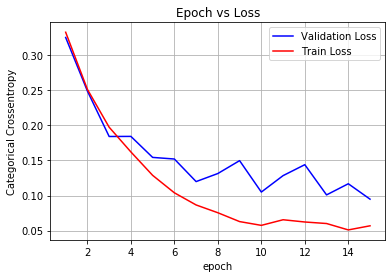

In [69]:
v_l_1, t_l_1 = plotting(history_1, 'loss')

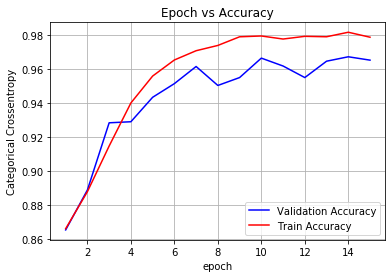

In [70]:
v_a_1, t_a_1 = plotting(history_1, 'acc')

In [71]:
tr_a_1 = np.round(max(t_a_1),3)
va_a_1 = np.round(max(v_a_1),3)

print("Train accuracy:", tr_a_1)
print("Validation accuracy:", va_a_1, '\n')

tr_l_1 = np.round(min(t_l_1),3)
va_l_1 = np.round(min(v_l_1),3)

print("Train loss:", tr_l_1)
print("Validation loss:", va_l_1)

Train accuracy: 0.982
Validation accuracy: 0.967 

Train loss: 0.051
Validation loss: 0.095


In [72]:
# Confusion Matrix
print(confusion_matrix(Y_test, model_1.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 510        0  ...                   0                27
SITTING                  0      370  ...                   0                 4
STANDING                 0       83  ...                   0                 1
WALKING                  0        0  ...                  10                 8
WALKING_DOWNSTAIRS       0        0  ...                 380                 3
WALKING_UPSTAIRS         0        1  ...                   1               440

[6 rows x 6 columns]


### Observation:

From the above confusion matrix, laying is very well predicted and sitting showing more errors when we compare to the other activities.

# Model-2

In [74]:
n_hidden_2 = 100

model_2 = Sequential()

# 2 LSTM layer
model_2.add(LSTM(n_hidden_2, input_shape = (timesteps, input_dim), return_sequences = True))  # 1 LSTM
model_2.add(Dropout(0.50))
model_2.add(LSTM(n_hidden_2))                         # 2 LSTM

model_2.add(Dropout(0.50))
model_2.add(Dense(n_classes, activation = 'sigmoid'))
model_2.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model_2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128, 100)          44000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 100)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 125,006
Trainable params: 125,006
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
history_2 = model_2.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size , validation_data = (X_test, Y_test))

# Final evaluation of the model
scores_2 = model_2.evaluate(X_test, Y_test, verbose = 1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/15
7352/7352 [==============================] - 167s 23ms/step - loss: 0.2884 - acc: 0.8746 - val_loss: 0.2225 - val_acc: 0.9043
Epoch 2/15
7352/7352 [==============================] - 165s 23ms/step - loss: 0.1741 - acc: 0.9301 - val_loss: 0.1731 - val_acc: 0.9248
Epoch 3/15
7352/7352 [==============================] - 163s 22ms/step - loss: 0.1139 - acc: 0.9611 - val_loss: 0.1477 - val_acc: 0.9512
Epoch 4/15
7352/7352 [==============================] - 163s 22ms/step - loss: 0.0803 - acc: 0.9741 - val_loss: 0.1336 - val_acc: 0.9514
Epoch 5/15
7352/7352 [==============================] - 161s 22ms/step - loss: 0.0602 - acc: 0.9800 - val_loss: 0.1122 - val_acc: 0.9659
Epoch 6/15
7352/7352 [==============================] - 162s 22ms/step - loss: 0.0568 - acc: 0.9794 - val_loss: 0.1504 - val_acc: 0.9607
Epoch 7/15
7352/7352 [==============================] - 161s 22ms/step - loss: 0.0542 - acc: 0.9800 - val_loss: 0.0869 - val_acc: 

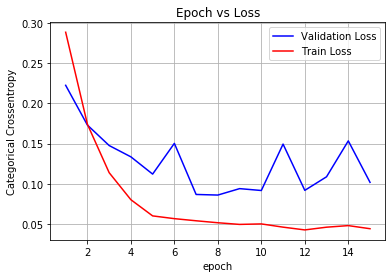

In [76]:
v_l_2, t_l_2 = plotting(history_2, 'loss')

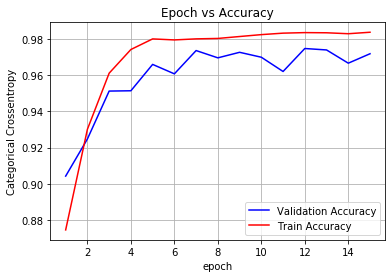

In [77]:
v_a_2, t_a_2 = plotting(history_2, 'acc')

In [78]:
tr_a_2 = np.round(max(t_a_2),3)
va_a_2 = np.round(max(v_a_2),3)

print("Train accuracy:", tr_a_2)
print("Validation accuracy:", va_a_2, '\n')

tr_l_2 = np.round(min(t_l_2),3)
va_l_2 = np.round(min(v_a_2),3)

print("Train loss:", tr_l_2)
print("Validation loss:", va_l_2)

Train accuracy: 0.984
Validation accuracy: 0.975 

Train loss: 0.043
Validation loss: 0.904


In [79]:
# Confusion Matrix
print(confusion_matrix(Y_test, model_2.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  6      337  ...                   0                 2
STANDING                 0       51  ...                   0                 3
WALKING                  0        0  ...                   9                15
WALKING_DOWNSTAIRS       0        0  ...                 408                 1
WALKING_UPSTAIRS         0        0  ...                   5               464

[6 rows x 6 columns]


# Model-3

In [80]:
n_hidden_3 = 150

model_3 = Sequential()

# 3 LSTM layer
model_3.add(LSTM(n_hidden_3, input_shape = (timesteps, input_dim), return_sequences = True))  # 1 LSTM
model_3.add(Dropout(0.75))
model_3.add(LSTM(n_hidden_3, return_sequences = True))    # 2 LSTM
model_3.add(Dropout(0.75))
model_3.add(LSTM(n_hidden_3))                             # 3 LSTM

model_3.add(Dropout(0.75))
model_3.add(Dense(n_classes, activation = 'sigmoid'))
model_3.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model_3.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 150)          96000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 150)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128, 150)          180600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 150)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [81]:
history_3 = model_3.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_data = (X_test, Y_test))

# Final evaluation of the model
scores_3 = model_3.evaluate(X_test, Y_test, verbose = 1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/15
7352/7352 [==============================] - 247s 34ms/step - loss: 0.3203 - acc: 0.8652 - val_loss: 0.3124 - val_acc: 0.8389
Epoch 2/15
7352/7352 [==============================] - 245s 33ms/step - loss: 0.2312 - acc: 0.8977 - val_loss: 0.2191 - val_acc: 0.8990
Epoch 3/15
7352/7352 [==============================] - 244s 33ms/step - loss: 0.1905 - acc: 0.9136 - val_loss: 0.2149 - val_acc: 0.9058
Epoch 4/15
7352/7352 [==============================] - 244s 33ms/step - loss: 0.1495 - acc: 0.9315 - val_loss: 0.1620 - val_acc: 0.9403
Epoch 5/15
7352/7352 [==============================] - 244s 33ms/step - loss: 0.0954 - acc: 0.9700 - val_loss: 0.1160 - val_acc: 0.9639
Epoch 6/15
7352/7352 [==============================] - 242s 33ms/step - loss: 0.0806 - acc: 0.9755 - val_loss: 0.1452 - val_acc: 0.9582
Epoch 7/15
7352/7352 [==============================] - 241s 33ms/step - loss: 0.0643 - acc: 0.9793 - val_loss: 0.1600 - val_acc: 

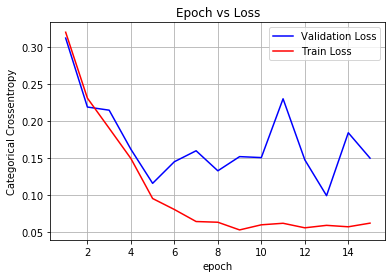

In [82]:
v_l_3, t_l_3 = plotting(history_3, 'loss')

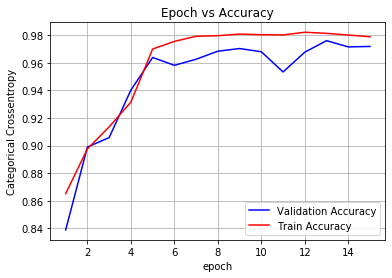

In [83]:
v_a_3, t_a_3 = plotting(history_3, 'acc')

In [84]:
tr_a_3 = np.round(max(t_a_3),3)
va_a_3 = np.round(max(v_a_3),3)

print("Train accuracy:", tr_a_3)
print("Validation accuracy:", va_a_3, '\n')

tr_l_3 = np.round(min(t_l_3),3)
va_l_3 = np.round(min(v_a_3),3)

print("Train loss:", tr_l_3)
print("Validation loss:", va_l_3)

Train accuracy: 0.982
Validation accuracy: 0.976 

Train loss: 0.053
Validation loss: 0.839


In [85]:
# Confusion Matrix
print(confusion_matrix(Y_test, model_3.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 520        0  ...                   0                17
SITTING                  0      419  ...                   1                 2
STANDING                 0      103  ...                   0                 0
WALKING                  7        5  ...                  15                 1
WALKING_DOWNSTAIRS       0        0  ...                 416                 0
WALKING_UPSTAIRS         0        0  ...                  21               441

[6 rows x 6 columns]


# Result

In [86]:
from prettytable import PrettyTable

print('\n')
a = PrettyTable()
a.field_names = ['S.No', 'LSTM Units', 'LSTM Layers', 'Drop Out', 'Test Loss', 'Test Accuracy']
a.add_row([1, 64, 1, 0.25, va_l_1, va_a_1])
a.add_row([2, 100, 2, 0.5, va_l_2, va_a_2])
a.add_row([3, 150, 3, 0.75, va_l_3, va_a_3])

print(a.get_string(title = "LSTM 1 and 3 Activation: sigmoid,    Optimizer: adam"))



+------+------------+-------------+----------+-----------+---------------+
| S.No | LSTM Units | LSTM Layers | Drop Out | Test Loss | Test Accuracy |
+------+------------+-------------+----------+-----------+---------------+
|  1   |     64     |      1      |   0.25   |   0.095   |     0.967     |
|  2   |    100     |      2      |   0.5    |   0.904   |     0.975     |
|  3   |    150     |      3      |   0.75   |   0.839   |     0.976     |
+------+------------+-------------+----------+-----------+---------------+


# Procedure

* Reading and storing the feature file containing all the names of the feature or columns in a list.

* Import the independent data values- train and test, and then attach the data values to the column names with the feature list.

* Similar process is followed to obtain dependent variables- train and test.


* Checking the database size of both dependent (x) and independent (y) variables, such as train and test dataset.
* Check the data value type.
* Visualization with countplot graph of the count of independent variables and unique values. It's the same with the pie chart.
* Visualizing the distribution to check if the dataset is balanced or imbalance and in what ratio it is imbalance.

* Removing dashes '-' and spaces ( ) from feature names to shorten the featuren name length.
* Checking if there are any null values. If found null values, either imputation is applied to fill the null values or else feature column(s) is removed depending on the count of null values. Also, visualizing null values graphically.
* Checking for duplicates. If found any, duplicates are removed.

Static and Dynamic Activities
* In static activities (sit, stand, lie down) motion information will not be very useful.
* In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.
* Visualising stationary activities (sitting, standing, laying) and moving activities (walking, walking downstairs, walking upstairs) to know how different these activities are.
* With boxplot, visualising how magnitude of an acceleration can separate activities well.
* With boxplot, visualising how position gravity acceleration component can separate activities well.
* Using T-SNE, we are reducing 561 dimension to 2 dimension and visualising how well activities can be separated.
* Visualizing in 2 dimension with change in perplexity to know which perplexity is better for visualising the separation of data.





### LSTM:
* Taking the raw data and only gyroscope and accelerometer related data as it is the main feature which actually records the stationary and/or motion or in other words 'activities'.
* With confusion matrix, we are analyzing how our model is predicting i.e how activities are predicted corresponding to original activities and how well model is predicting correctly.
* Tuning LSTM units with 64, 100 and 150.
* Tuning dropout rates with 0.25, 0.5 and 0.75.
### Conclusion - 
* For every hyperparameter tuning, we are visualizing how test loss and test accuracy is improing or deteriorating.
* At the end, concluding which hyperparameter is better to get better accuracy and lower test loss.


